<a href="https://colab.research.google.com/github/basartimucin/MPA-MLF/blob/main/Week_4_Lab_05_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPA-MLF, Lab 5 - Feedforward Neural Networks

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Exercise 1 - XOR problem

### 0. First import libraries

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import tensorflow as tf
import matplotlib.pyplot as plt

### 1. prepare data

In [28]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

### 2. Creating the model

In [29]:
model = Sequential()
model.add(InputLayer(input_shape=(2)))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

### 3. Compile the model

In [30]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

To train your model, run the following line of the code:

In [31]:
history = model.fit(X, y, epochs=5, batch_size=1, verbose=0)

### 5. Model evaluation

In [32]:
loss, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))

Accuracy: 50.00


### 6. Model predictions

In [33]:
for id_x, data_sample in enumerate(X):
  prediction = model.predict([data_sample])
  print(f"Data sample is {data_sample}, prediction from model {prediction}, ground_truth {y[id_x]}")

1/1 [==============================] - 0s 67ms/step
Data sample is [0, 0], prediction from model [[0.44416383]], ground_truth 0
1/1 [==============================] - 0s 35ms/step
Data sample is [0, 1], prediction from model [[0.45323247]], ground_truth 1
1/1 [==============================] - 0s 35ms/step
Data sample is [1, 0], prediction from model [[0.4445611]], ground_truth 1
1/1 [==============================] - 0s 37ms/step
Data sample is [1, 1], prediction from model [[0.45362645]], ground_truth 0


### 7. Display loss function during the training process and acuracy

Text(0, 0.5, 'loss')

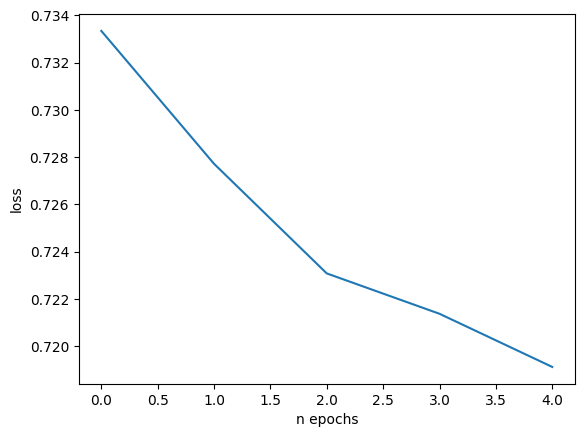

In [34]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

### TASK:

In this part of the exercise, the task would be to play around with the code above to see the influence of hyperparameters.

As we know from the lecture, neural networks contain two types of parameters:
  1. **Learnable parameters** - *weights* and *biases*. these parameters are adjusted in the training process.  
  2. **Non-learnable parameters (hyperparameters)** - learning_rate, number_of_neurons, number_of_layers, number_of_epochs, type of activation functions in the neurons.., basically any user-defined setting is considered to be hyperparameter


Change the following parameters:
- number of epochs
- learning_rate
- activation functions in layers,
- batch_size,
- verbose,
- number of neurons in the hidden layer

Moreover, see the influence on the training process and results.

**Note: Every time we change some hyper-parameters, do not forget to compile the model, to initialize the learnable parameters again**

## Exercise 2 - Congressional Voting Data

In the attached dataset, results from congressional voting can be found. Your task is to train a model that can recognize that the politician is *republican* or *democrat* based on voting results. We would follow the general machine learning steps that were described in the lecture.

In [35]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### 1. Loading dataset

**First mount your google drive to google colab file.**

In [36]:
path_to_dataset = '/content/drive/MyDrive/Exercises-main 2/Lab_05/voting_complete.csv'
pd_dataset = pd.read_csv(path_to_dataset)

### 2. Train/Test Split

Fistlty we need to split our dataset into train and test. We will use 80% of dataset as our trainset and 20% od dataset as our testset. You can use functions included in *keras*, *scikit-learn*, or you can write your own:

In [37]:
def train_test_split(pd_data: pd.DataFrame, test_ratio: float = 0.2) -> tuple:
    pd_dataset = pd_data.copy()
    pd_dataset = pd_dataset[pd_dataset.columns[1:]]
    index = np.arange(len(pd_dataset))
    index = np.random.permutation(index)
    train_ammount = int(len(index)*test_ratio)
    train_ids = index[train_ammount:]
    test_ids = index[:train_ammount]

    train_dataset = pd_dataset[pd_dataset.index.isin(train_ids)].reset_index()
    test_dataset = pd_dataset[pd_dataset.index.isin(test_ids)].reset_index()

    train_dataset = train_dataset[train_dataset.columns[1:]]
    test_dataset = test_dataset[test_dataset.columns[1:]]

    return train_dataset[train_dataset.columns[1:]], train_dataset[train_dataset.columns[0]], test_dataset[test_dataset.columns[1:]], test_dataset[test_dataset.columns[0]]


### 3. Data examination

The task would be to examine the dataset. Check:

1. Is it a classification of regression task?
2. How many data samples do we have?
3. How many features do we have?  
4. What data types do we have in our dataset?
5. Are there any missing values?
6. How many labels do we have?


In [38]:
pd_dataset = pd.read_csv(path_to_dataset, na_values='?')
pd_dataset.replace('?', np.nan, inplace=True)
label_dtype = pd_dataset[pd_dataset.columns[0]].dtype
task_type = "Classification" if label_dtype == object else "Regression"
print("Task Type:", task_type)
num_samples = len(pd_dataset)
print("Number of Data Samples:", num_samples)
num_features = len(pd_dataset.columns) - 1
print("Number of Features:", num_features)
feature_data_types = pd_dataset.dtypes[1:]
print("Data Types of Features:")
print(feature_data_types)
missing_values = pd_dataset.isnull().sum().sum()
if missing_values > 0:
    print("Missing Values Present: Yes")
    print("Total Missing Values:", missing_values)
else:
    print("Missing Values Present: No")

num_labels = pd_dataset[pd_dataset.columns[0]].nunique()
print("Number of Labels:", num_labels)


Task Type: Regression
Number of Data Samples: 435
Number of Features: 17
Data Types of Features:
Class Name                                object
handicapped-infants                       object
water-project-cost-sharing                object
adoption-of-the-budget-resolution         object
physician-fee-freeze                      object
el-salvador-aid                           object
religious-groups-in-schools               object
anti-satellite-test-ban                   object
aid-to-nicaraguan-contras                 object
mx-missile                                object
immigration                               object
synfuels-corporation-cutback              object
education-spending                        object
superfund-right-to-sue                    object
crime                                     object
duty-free-exports                         object
export-administration-act-south-africa    object
dtype: object
Missing Values Present: Yes
Total Missing Values: 392
Nu

### 4. Data preprocessing

When you preprocess your traing data, do not forget that you need to apply the same preprocessing also for your test set. For example: If you decide to delete some columns in your train set, you have to delete the same columns in your test set.

Possible preprocessing steps (try several and see the influence of your preprocessing on your results)
 - Replace missing values with any data imputation technique ( for example, the most occurring value in the column), then perform one-hot encoding or label encoding of your data
 - Consider the missing value to be the third category 'unknown' and then perform one-hot encoding or label encoding

The target value also has to be encoded. This can be done by one-hot encoding or label encoding.

In [39]:
# for a =1 unkown wales replaced with most frequrent ones , for a= 1 unkown values are different category
a=1;

In [40]:
if (a==0):
  x_train, y_train, x_test, y_test = train_test_split(pd_dataset)

  x_train_hotencoded = pd.get_dummies(x_train, dummy_na=True)
  x_test_hotencoded = pd.get_dummies(x_test, dummy_na=True)

  label_encoder_y = LabelEncoder()
  y_train_encoded = label_encoder_y.fit_transform(y_train)
  y_test_encoded = label_encoder_y.fit_transform(y_test)

  x_train_array = x_train_hotencoded.to_numpy()
  x_test_array = x_test_hotencoded.to_numpy()
  y_train_array = y_train_encoded
  y_test_array = y_test_encoded
  np.set_printoptions(threshold=np.inf)
  print(x_test_array.shape)

In [41]:
if (a==1):
  pd_dataset.fillna(pd_dataset.mode().iloc[0], inplace=True)

  x_train, y_train, x_test, y_test = train_test_split(pd_dataset)
  categorical_columns = [col for col in x_train.columns if x_train[col].dtype == 'object']
  x_train_hotencoded = pd.get_dummies(x_train, columns=categorical_columns)
  categorical_columns = [col for col in x_test.columns if x_test[col].dtype == 'object']
  x_test_hotencoded = pd.get_dummies(x_test, columns=categorical_columns)

  label_encoder_y = LabelEncoder()
  y_train_encoded = label_encoder_y.fit_transform(y_train)
  y_test_encoded = label_encoder_y.fit_transform(y_test)

  x_train_array = x_train_hotencoded.to_numpy()
  x_test_array = x_test_hotencoded.to_numpy()
  y_train_array = y_train_encoded
  y_test_array = y_test_encoded
  print(x_test_array.shape)

(87, 32)


### 5. Creating the model

1. Create your model using alteast one hidden layer.

*hint: do not create too complex models, this is a very simple task, so it would be enought to use just few neurons in the hidden layers*

In [42]:
model = Sequential()
model.add(InputLayer(input_shape=(x_train_array.shape[1],)))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

2. Check what *model.summary()* does

In [43]:
# WRITE YOU CODE HERE

3. Compile the model, choose a suitable loss function, choose gradient to descend optimizer and specify the learning rate, and choose accuracy as our metric

In [44]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 4)                 132       
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 137 (548.00 Byte)
Trainable params: 137 (548.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


4. Train the model. Specify the number of epochs and batch size. Now is the time to create a validation dataset. Set 20% of dataset to be a validation dataset

In [45]:
history = model.fit(x_train_array, y_train_array, epochs=100, batch_size=4,
                    validation_split=0.2)

Epoch 1/100
70/70 [==============================] - 1s 6ms/step - loss: 0.7599 - accuracy: 0.3669 - val_loss: 0.7486 - val_accuracy: 0.3143
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6666 - accuracy: 0.5144 - val_loss: 0.6764 - val_accuracy: 0.5857
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 0.6168 - accuracy: 0.8381 - val_loss: 0.6329 - val_accuracy: 0.7857
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 0.5831 - accuracy: 0.8849 - val_loss: 0.6035 - val_accuracy: 0.8143
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 0.5566 - accuracy: 0.8885 - val_loss: 0.5815 - val_accuracy: 0.8000
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 0.5334 - accuracy: 0.8921 - val_loss: 0.5625 - val_accuracy: 0.8000
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 0.5114 - accuracy: 0.8921 - val_loss: 0.5459 - val_accuracy: 0.8000
Epoch 8/100
7

### 7. Model Evaluation



1. First, apply the same preprocessing you did to train set to test set also

In [46]:
# WRITE YOUR CODE HERE


2. Evaluate the model, print final accuracy and loss

In [47]:
# WRITE YOUR CODE HERE
loss, accuracy = model.evaluate(x_test_array, y_test_array)
print('Final Loss:', loss)
print('Final Accuracy:', accuracy)

3/3 [==============================] - 0s 5ms/step - loss: 0.2080 - accuracy: 0.9425
Final Loss: 0.2080000936985016
Final Accuracy: 0.9425287246704102


3. Plot loss and validation loss depending on the training epochs into one graph. In another graph, plot accuracy and validation accuracy

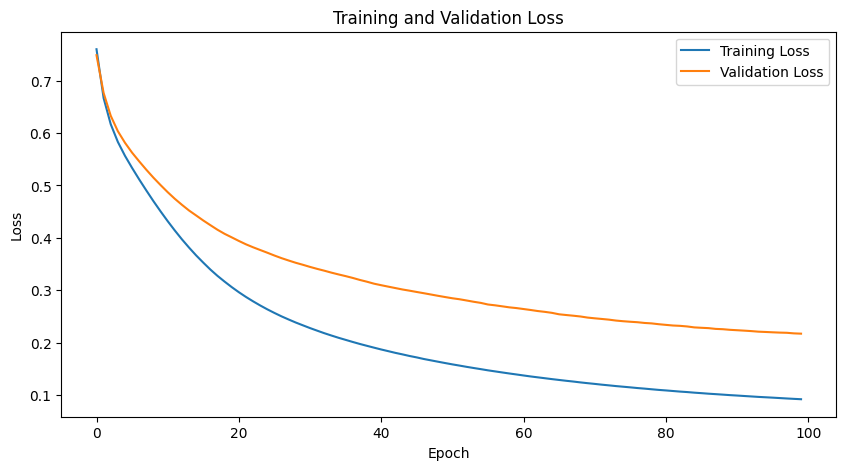

In [48]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

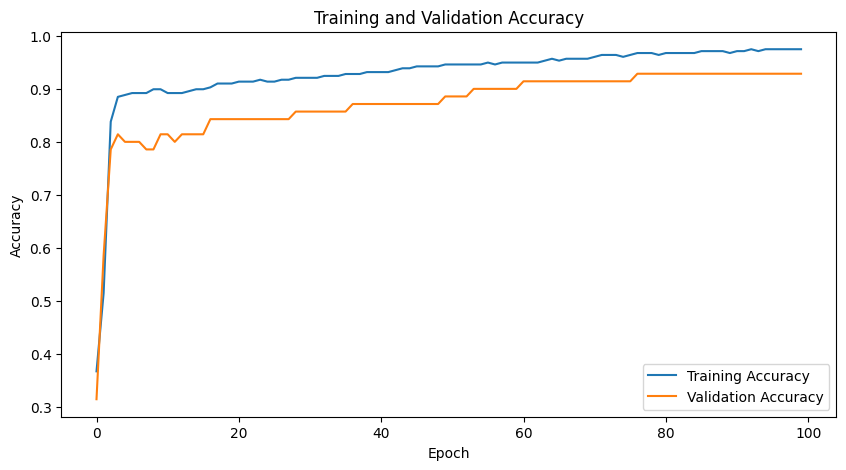

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()